<a href="https://colab.research.google.com/github/shashwatsingh6325/TraffiCop.AI/blob/main/helmet_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.7/112.6 GB disk)


In [3]:
!pip install roboflow
from google.colab import userdata
from roboflow import Roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ytelxu6ci6ZHQYERianx")
project = rf.workspace("sign-language-hmfr8").project("helmet_detection-pypw1")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to helmet_detection-1 in yolov11:: 100%|██████████| 217/217 [00:00<00:00, 1859.32it/s]


In [4]:
!yolo task=detect mode=train model=yolo11s.pt data=/content/helmet_detection-1/data.yaml epochs=60 imgsz=640 plots=True

100% 18.4M/18.4M [00:00<00:00, 212MB/s]
New https://pypi.org/project/ultralytics/8.3.81 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/helmet_detection-1/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retin

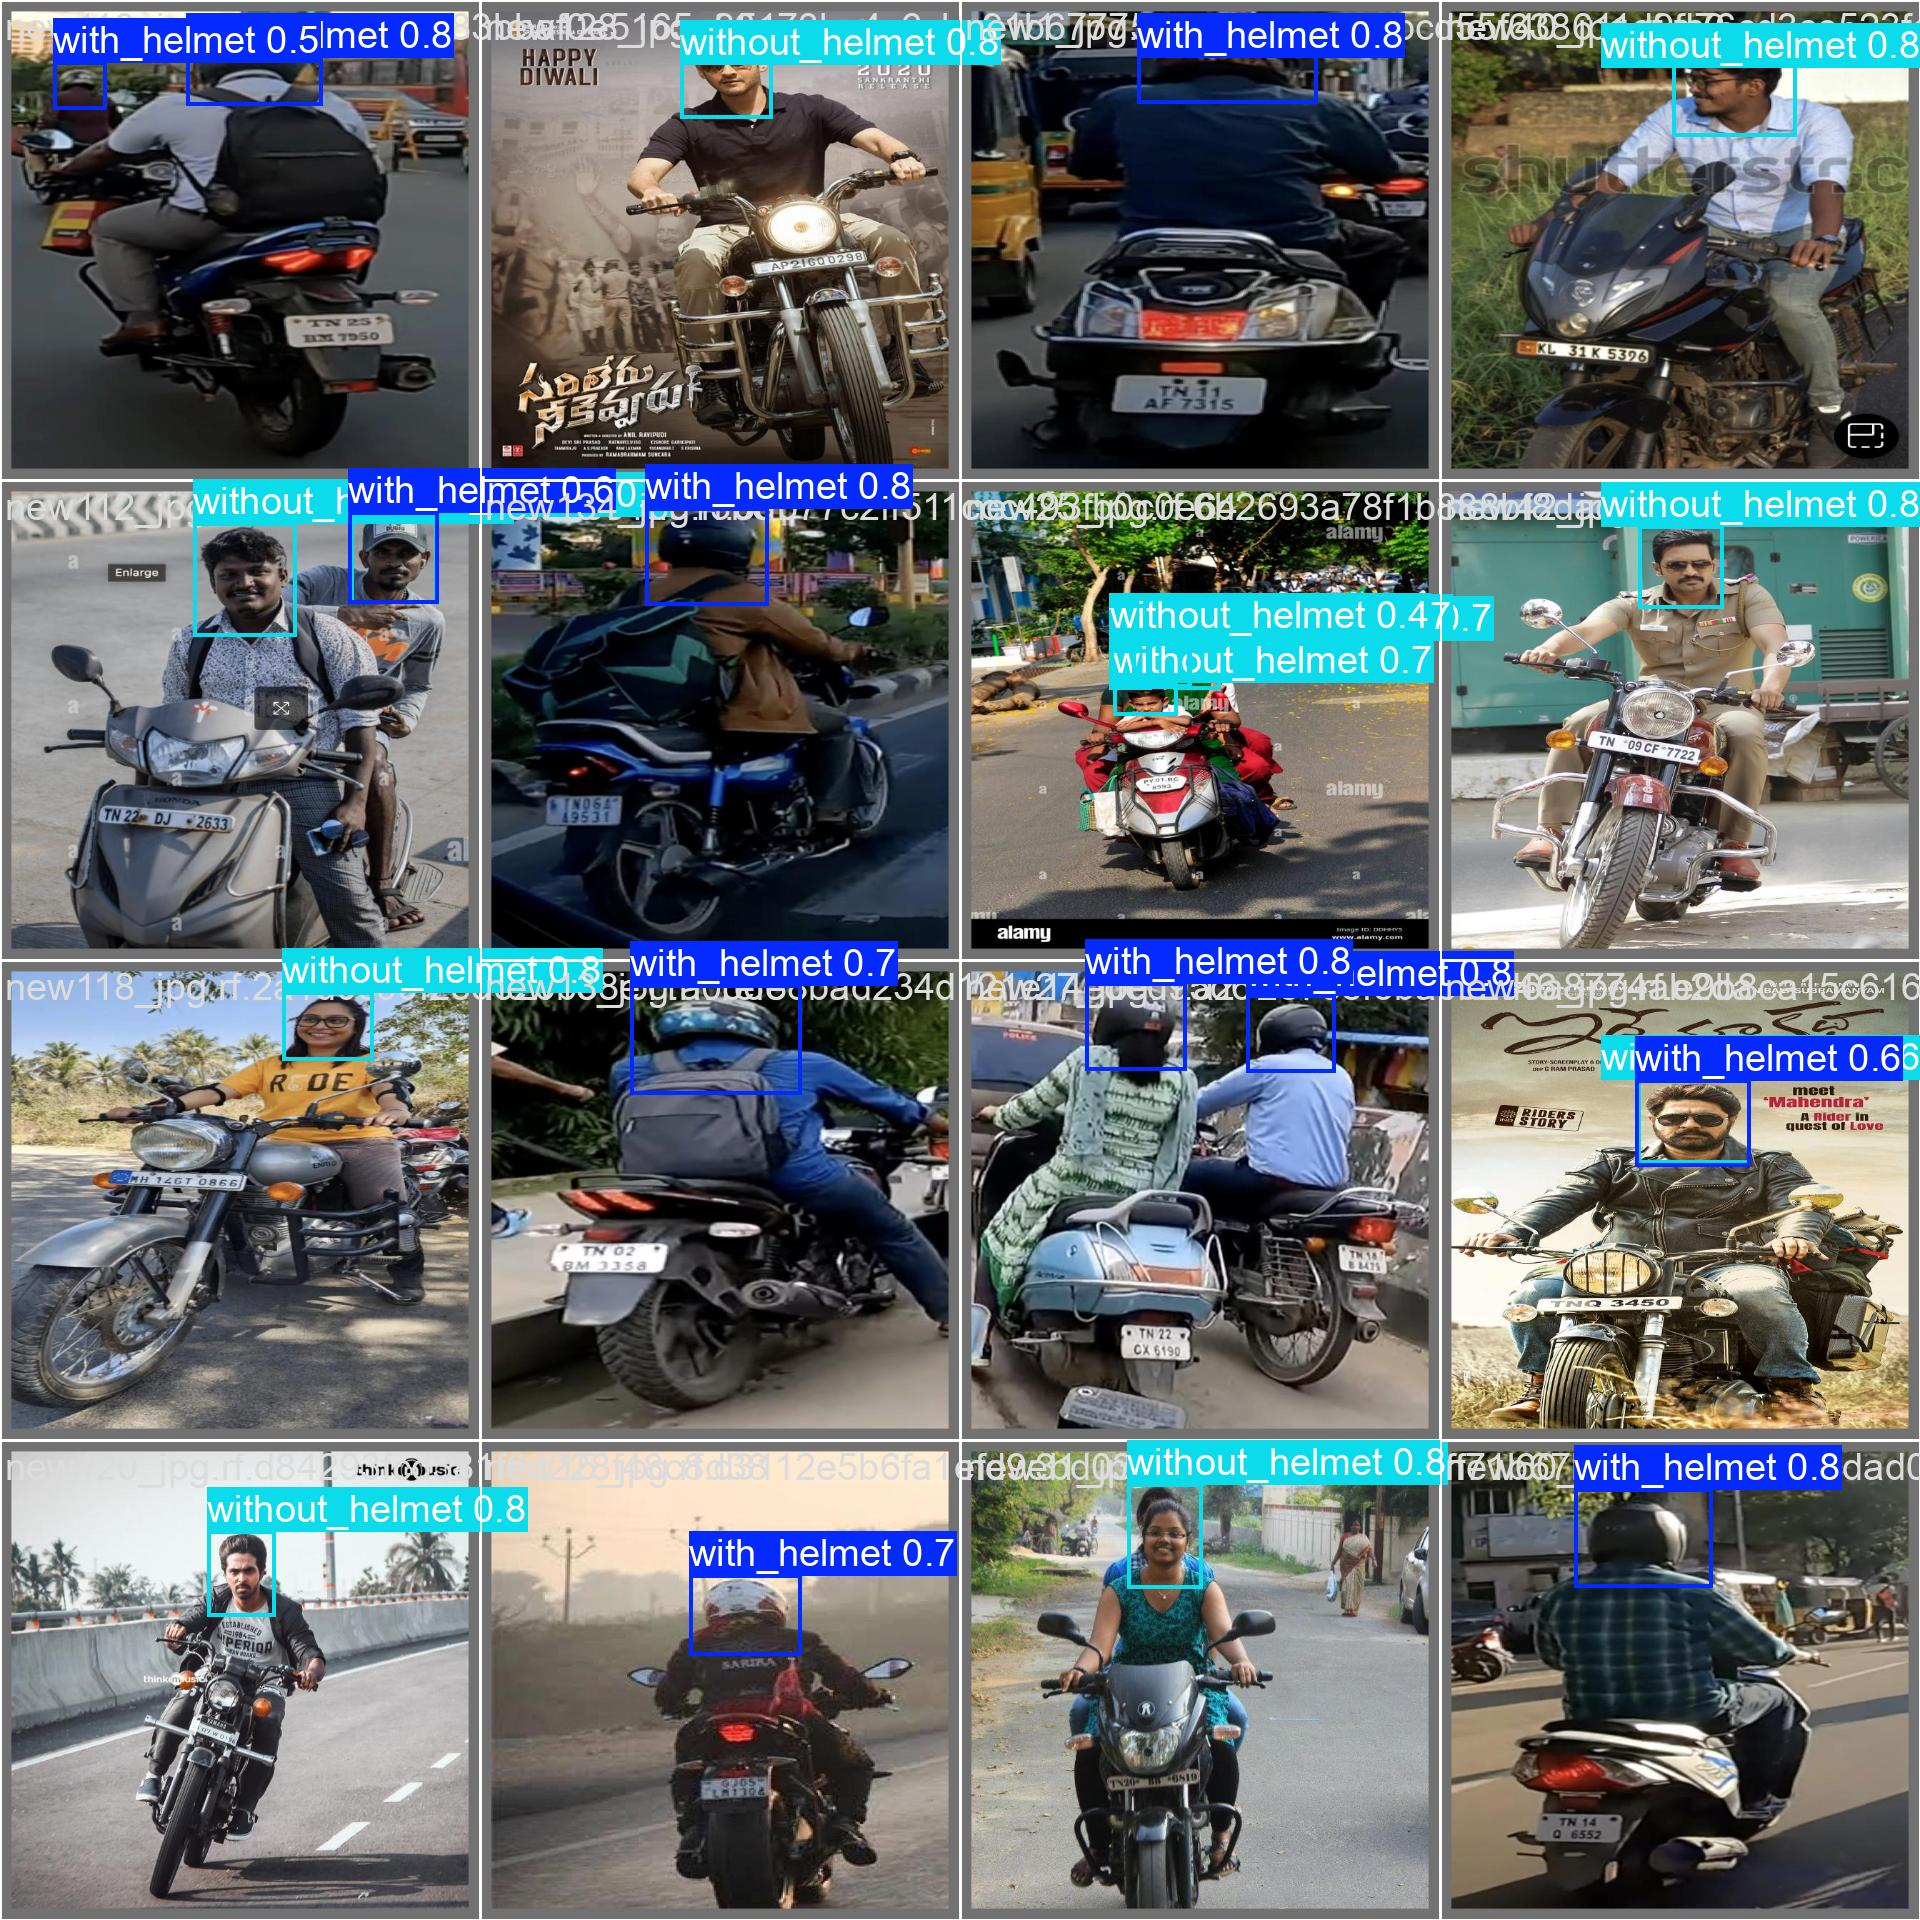

In [5]:
from IPython.display import Image as IPyImage

IPyImage(filename='/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [6]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/helmet_detection-1/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/helmet_detection-1/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  2.12it/s]
                   all         21         27      0.873      0.969      0.943      0.507
           with_helmet          9         11      0.843          1      0.981      0.568
        without_helmet         12         16      0.904      0.938      0.905      0.446
Speed: 0.3ms preprocess, 23.9ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [9]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/man1.jpg save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/1 /content/man1.jpg: 448x640 1 with_helmet, 52.8ms
Speed: 4.1ms preprocess, 52.8ms inference, 171.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


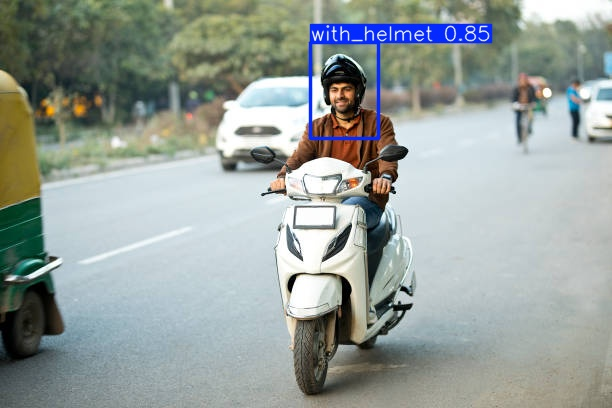

In [10]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")